# Exoplanet Data Exploration

Here are some of my initial attempts to look at the exoplanet datasets from Kepler. The dataset is highly unbalanced, so a fully automated analysis will be quite difficult. We also have to be careful since there are other effects such as rotating spots that might fake the kind of signal from an exoplanet.

First, we'll load some packages and read in the dataset.

In [1]:
import pandas as pd
import sklearn as sk
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('C:/Users/AYUSH MISHRA/Downloads/exoTest/exoTest.csv',index_col=0)

Now we'll look at the top few lines

In [2]:
df.head()

,LABEL,FLUX-1,FLUX-2,FLUX-3,FLUX-4,FLUX-5,FLUX-6,FLUX-7,FLUX-8,FLUX-9,...,FLUX-3188,FLUX-3189,FLUX-3190,FLUX-3191,FLUX-3192,FLUX-3193,FLUX-3194,FLUX-3195,FLUX-3196,FLUX-3197
1,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
2,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
3,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
4,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
5,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


Evidently, the exoplanets are located at the beginning of the dataset. Otherwise, this is just a bunch of numbers. Let's drop the label for now so it'll be easier to transform the data.

In [3]:
labels = df.LABEL
df = df.drop('LABEL',axis=1)

# Statistics

Let's look at some basic statistics.

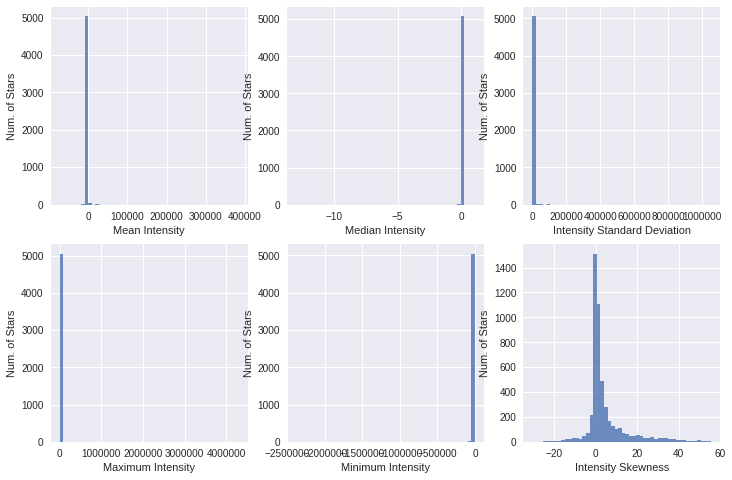

In [4]:
def stats_plots(df):
    means = df.mean(axis=1)
    medians = df.median(axis=1)
    std = df.std(axis=1)
    maxval = df.max(axis=1)
    minval = df.min(axis=1)
    skew = df.skew(axis=1)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(231)
    ax.hist(means,alpha=0.8,bins=50)
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(232)
    ax.hist(medians,alpha=0.8,bins=50)
    ax.set_xlabel('Median Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(233)
    ax.hist(std,alpha=0.8,bins=50)
    ax.set_xlabel('Intensity Standard Deviation')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(234)
    ax.hist(maxval,alpha=0.8,bins=50)
    ax.set_xlabel('Maximum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(235)
    ax.hist(minval,alpha=0.8,bins=50)
    ax.set_xlabel('Minimum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(236)
    ax.hist(skew,alpha=0.8,bins=50)
    ax.set_xlabel('Intensity Skewness')
    ax.set_ylabel('Num. of Stars')

stats_plots(df)
plt.show()

There are some major outliers here that we should remove. I'll leave that alone for now though.

What happens if we pick more sensible axes and look at the exoplanet stars and the non-exoplanet stars?

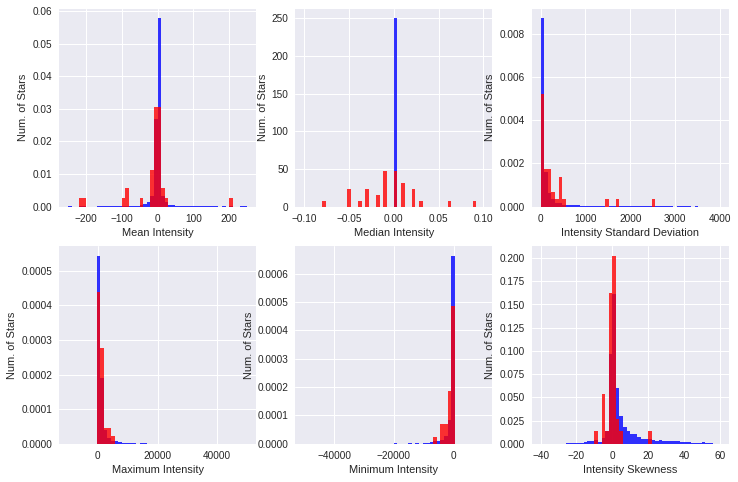

In [5]:
def stats_plots_label(df):
    means1 = df[labels==1].mean(axis=1)
    medians1 = df[labels==1].median(axis=1)
    std1 = df[labels==1].std(axis=1)
    maxval1 = df[labels==1].max(axis=1)
    minval1 = df[labels==1].min(axis=1)
    skew1 = df[labels==1].skew(axis=1)
    means2 = df[labels==2].mean(axis=1)
    medians2 = df[labels==2].median(axis=1)
    std2 = df[labels==2].std(axis=1)
    maxval2 = df[labels==2].max(axis=1)
    minval2 = df[labels==2].min(axis=1)
    skew2 = df[labels==2].skew(axis=1)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(231)
    ax.hist(means1,alpha=0.8,bins=50,color='b',normed=True,range=(-250,250))
    ax.hist(means2,alpha=0.8,bins=50,color='r',normed=True,range=(-250,250))
    ax.get_legend()
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(232)
    ax.hist(medians1,alpha=0.8,bins=50,color='b',normed=True,range=(-0.1,0.1))
    ax.hist(medians2,alpha=0.8,bins=50,color='r',normed=True,range=(-0.1,0.1))
    ax.get_legend()

    ax.set_xlabel('Median Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(233)    
    ax.hist(std1,alpha=0.8,bins=50,normed=True,color='b',range=(0,4000))
    ax.hist(std2,alpha=0.8,bins=50,normed=True,color='r',range=(0,4000))
    ax.get_legend()

    ax.set_xlabel('Intensity Standard Deviation')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(234)
    ax.hist(maxval1,alpha=0.8,bins=50,normed=True,color='b',range=(-10000,50000))
    ax.hist(maxval2,alpha=0.8,bins=50,normed=True,color='r',range=(-10000,50000))
    ax.get_legend()

    ax.set_xlabel('Maximum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(235)
    ax.hist(minval1,alpha=0.8,bins=50,normed=True,color='b',range=(-50000,10000))
    ax.hist(minval2,alpha=0.8,bins=50,normed=True,color='r',range=(-50000,10000))
    ax.get_legend()

    ax.set_xlabel('Minimum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(236)
    ax.hist(skew1,alpha=0.8,bins=50,normed=True,color='b',range=(-40,60))
    ax.hist(skew2,alpha=0.8,bins=50,normed=True,color='r',range=(-40,60)) 
    ax.get_legend()

    ax.set_xlabel('Intensity Skewness')
    ax.set_ylabel('Num. of Stars')

stats_plots_label(df)
plt.show()

The distributions look pretty similar except in the case of median intensity, where the data look like they're restricted to a limited number of values. The skewness is also a bit different, likely because exoplanets are associated with dips in the intensity. So what's going on with the median?

In [6]:
df[labels==1].median(axis=1).describe()

count    5050.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

Clearly, there's something wrong there. It looks like the exoplanet data and non-exoplanet data were processed slightly differently. The median for non-exoplanet data seems to have been defined to be zero. This might make it difficult to build a useful classifier. right now.

# Visualizations of Intensity Time Series

Let's first look at the data from all 37 exoplanet stars and an identical number of non-exoplanet stars so we can get some sense of what features we might want to look for.

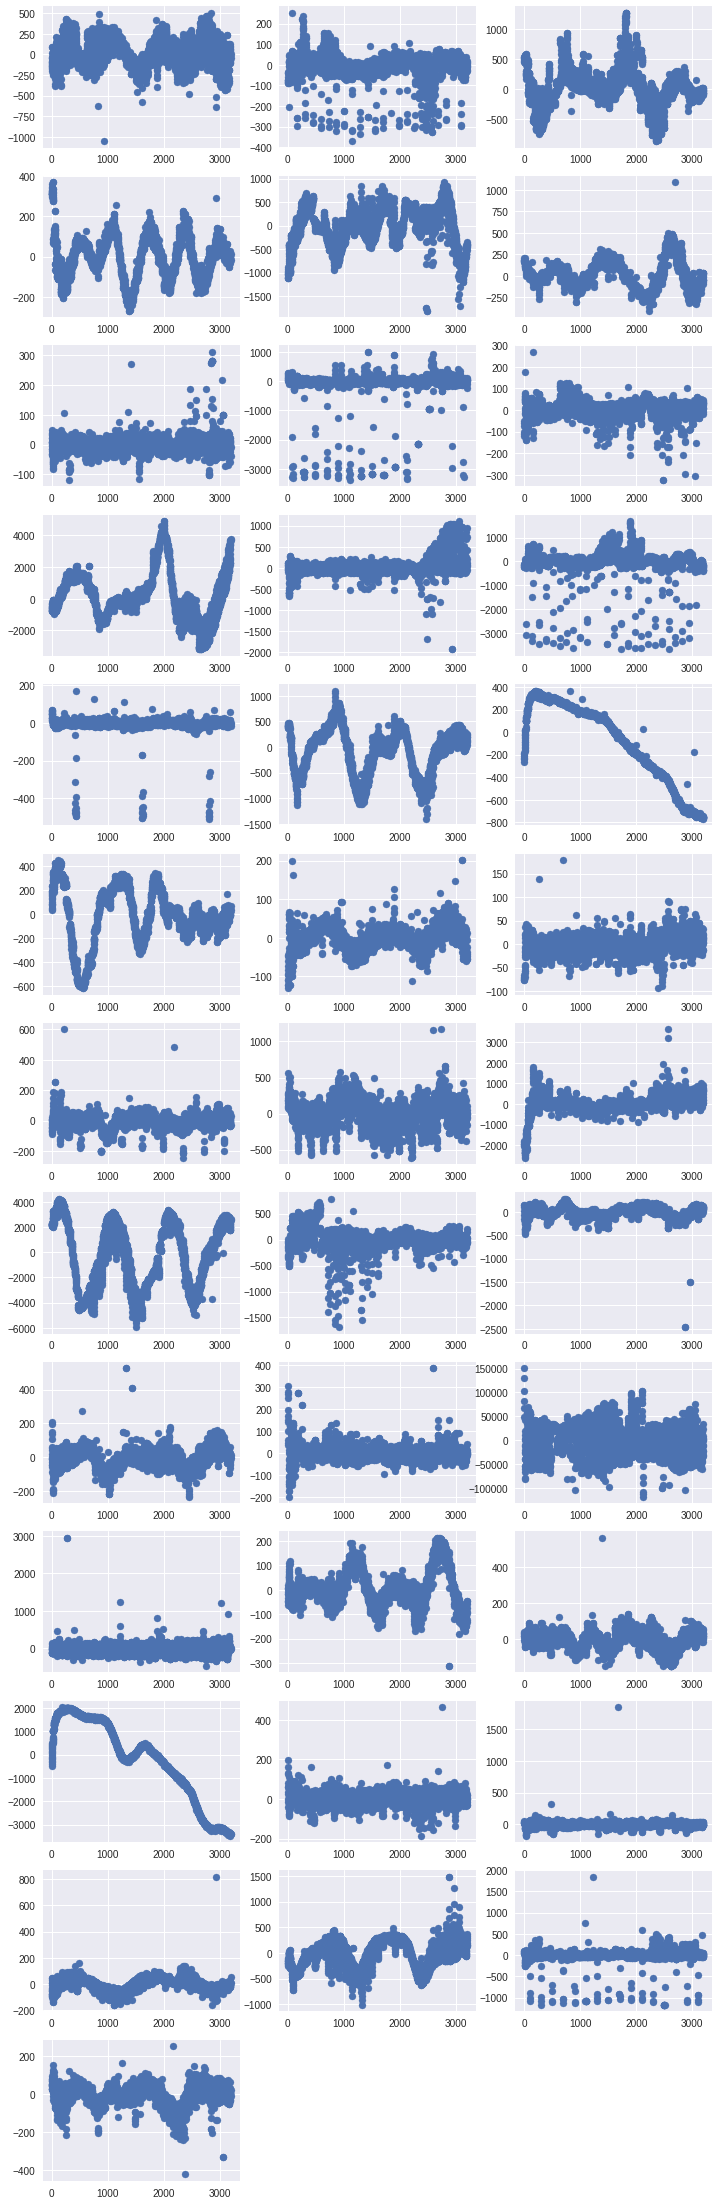

In [7]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df[labels==2].iloc[i,:])

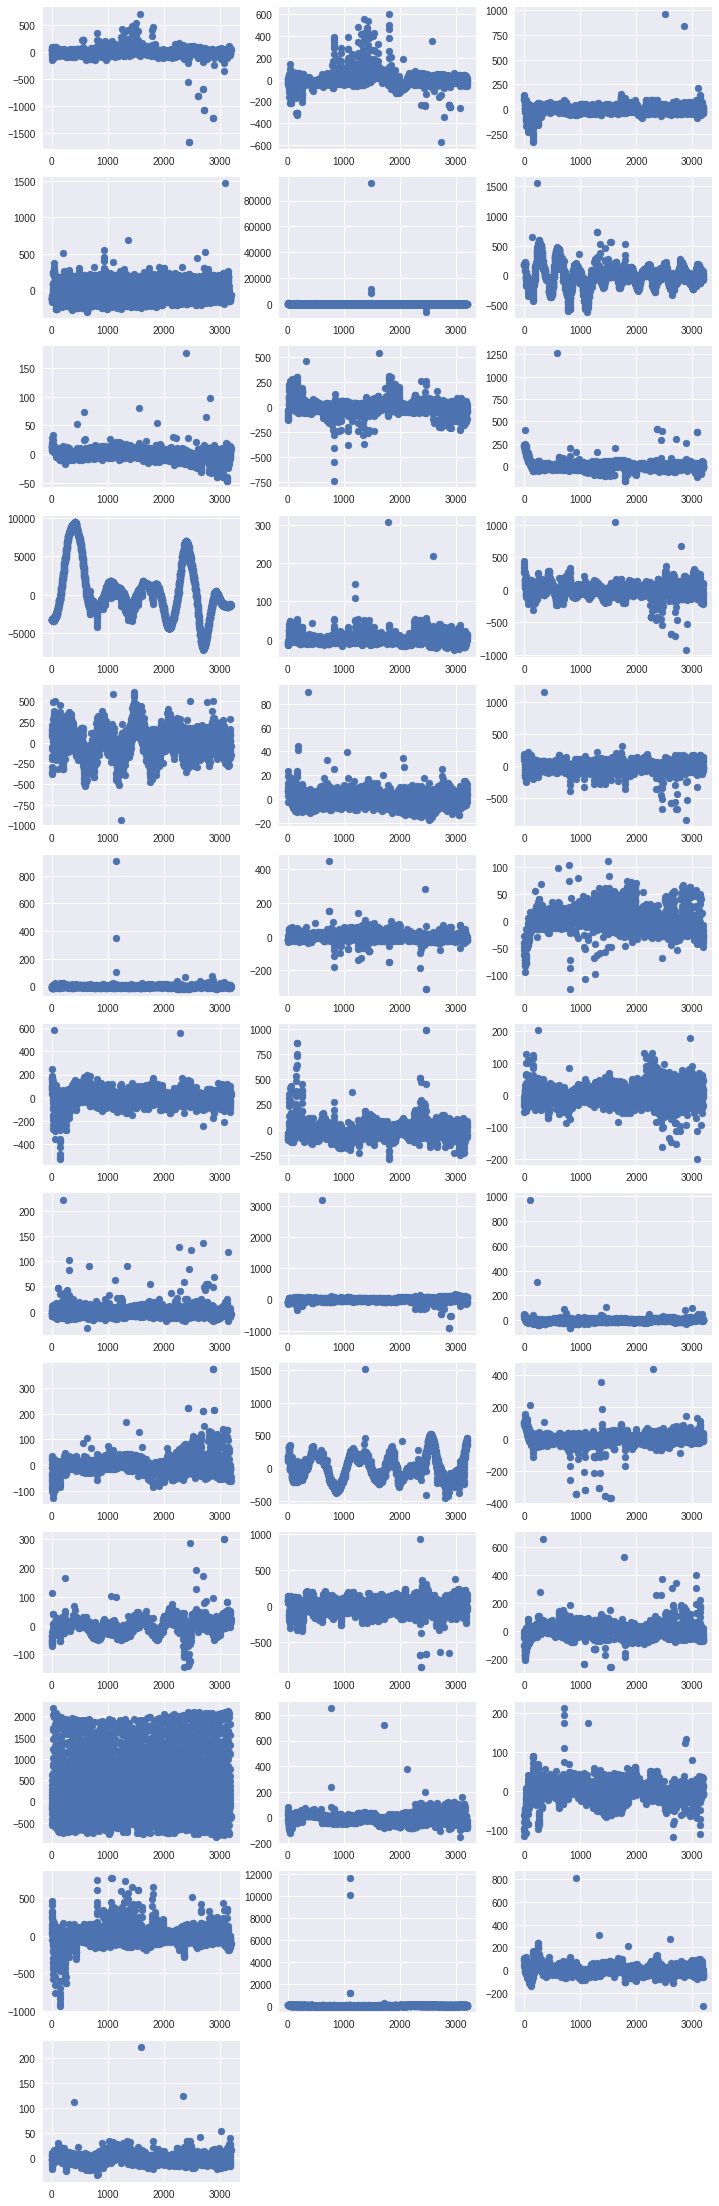

In [8]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df[labels==1].iloc[i,:])

There's tons of features that we can see here. We see both longer-scale structure and wildly different amounts of seemingly random noise. If you zoom in, a lot of noise looks sinusoidal. We also see a lot of anomalous points, particularly at high intensity. The clearest exoplanet signatures are fairly regular downward spikes in the data. Let's look at one of these.

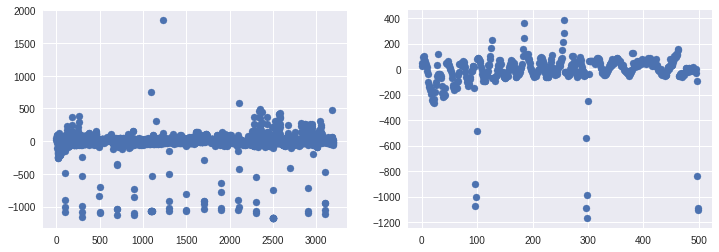

In [9]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.scatter(x,df[labels==2].iloc[35,:])
ax = fig.add_subplot(122)
plt.scatter(np.array(range(500)),df[labels==2].iloc[35,:500])
plt.show()

On the plot on the right (zoomed in) we can clearly see a sinusoidal structure. There are also upward pulses in the plot on the left, particularly toward the end. Maybe these could be spots? Instrument noise is also a possibility (I would guess more likely).

Less clear are some possible signals of an almost rectangular pulse visible on the more general structure. A couple that have this kind of feature are shown below. These don't necessarily repeat and will likely be much more difficult to find. One of these seems to even have both kinds of features.

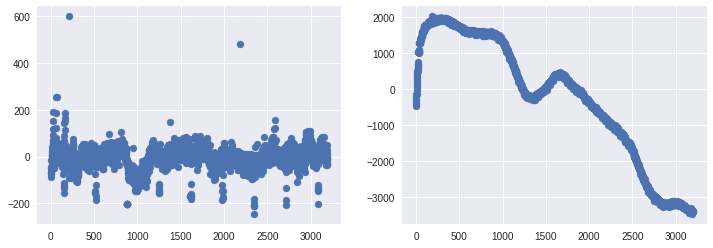

In [10]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.scatter(x,df[labels==2].iloc[18,:])
ax = fig.add_subplot(122)
plt.scatter(x,df[labels==2].iloc[30,:])
plt.show()

The plot on the left has a single larger dip and a bunch of fast dips. The one on the right seems to have two transits but also has a very unstable signal that will need to be accounted for. 

We also see that the amount of noise isn't necessarily stable even within one signal. The data below show a star with an exoplanet that has both a complicated general structure and a great deal of noise toward the end. The exoplanet signal is not clear at all here, at least not without further processing of data.

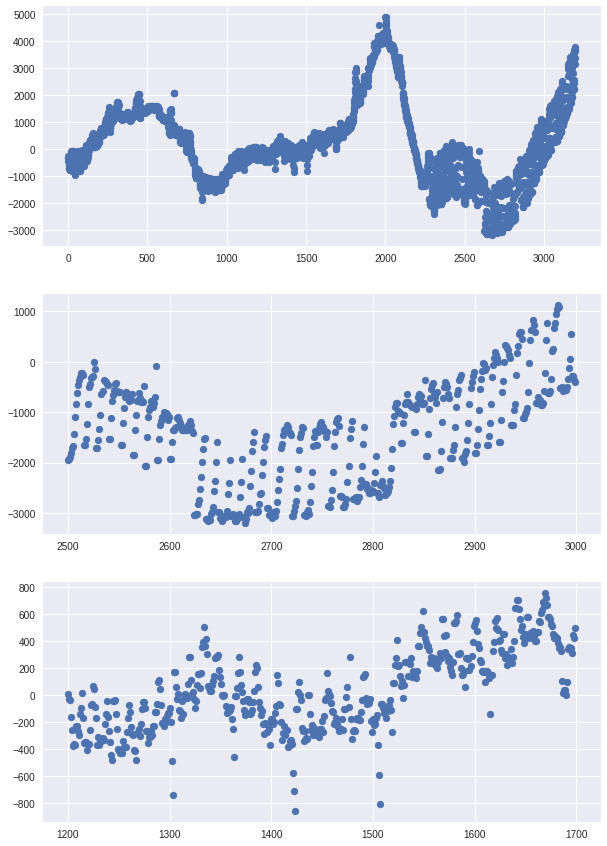

In [11]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(311)
ax.scatter(x,df[labels==2].iloc[9,:])
ax = fig.add_subplot(312)
ax.scatter(np.array(range(2500,3000)),df[labels==2].iloc[9,2500:3000])
ax = fig.add_subplot(313)
ax.scatter(np.array(range(1200,1700)),df[labels==2].iloc[9,1200:1700])
plt.show()

The middle plot shows some samples toward the end. The noise has some strange structure. It's not sinusoidal, but it clearly repeates. Toward the middle, we can see a few dips that maybe could be from a planet. Noisier repeating structures are also visible here.

I've mentioned a few issues with the data, so now let's try to do some data cleaning.

# Data Processing

## Outlier Removal

First, remember that we saw a lot of high-valued outliers. Let's try to get rid of those.

To do this, I'll take the top 1% of data points and replace them with the mean of the 4 points on either side, as long as that value is lower. We're looking for dips in the data, so removing a few % shouldn't affect things much.

In [12]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX-'+str(idx2)]
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                df.set_value(i,idx,new_val)
        
            
    return df

To make things a bit easier, I'll take two subsamples: The exoplanet set and 100 random samples from the non-exoplanet set.

I'll run the outlier remover twice, altering 2% of the data points.

In [13]:
df_exo = df[labels==2]
df_non = df[labels==1]
df_non = df_non.sample(n=100,random_state=999)
for i in range(2):
    df_exo = reduce_upper_outliers(df_exo)
for i in range(2):
    df_non = reduce_upper_outliers(df_non)

So what did that do? Well, we see below that we've removed the vast majority of the high-valued outliers. There are still some problem areas in a few of these, mostly due to having a series of nearby high points. There is also some clipping there, but as I've mentioned, this shouldn't give us too much trouble.

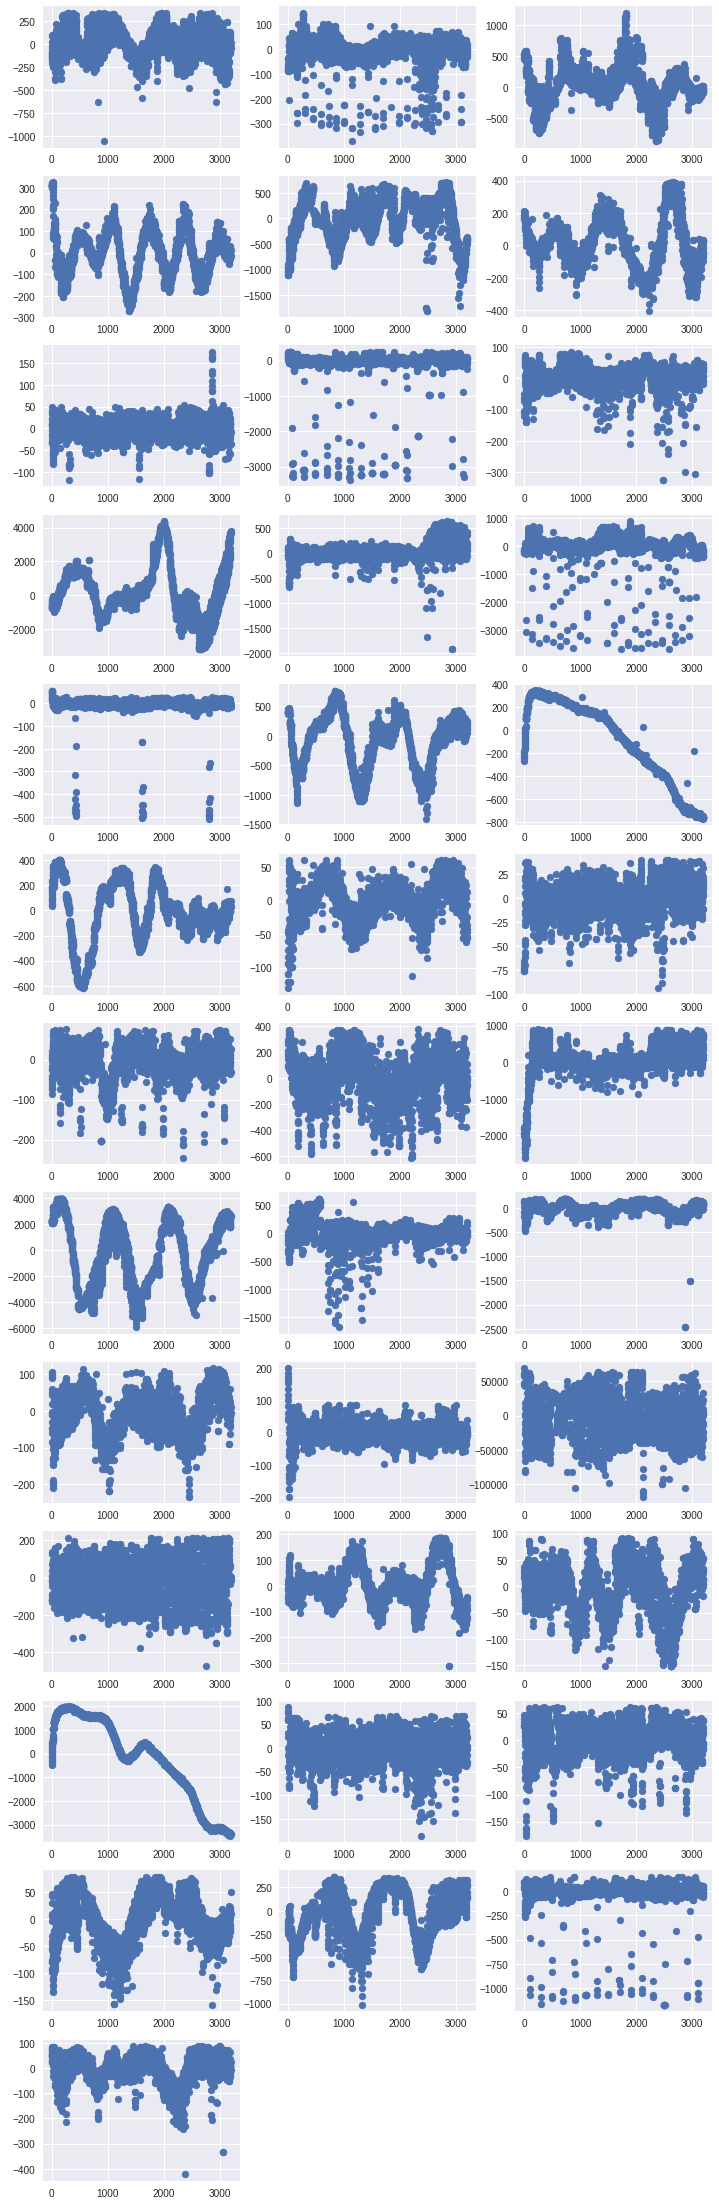

In [14]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df_exo.iloc[i,:])

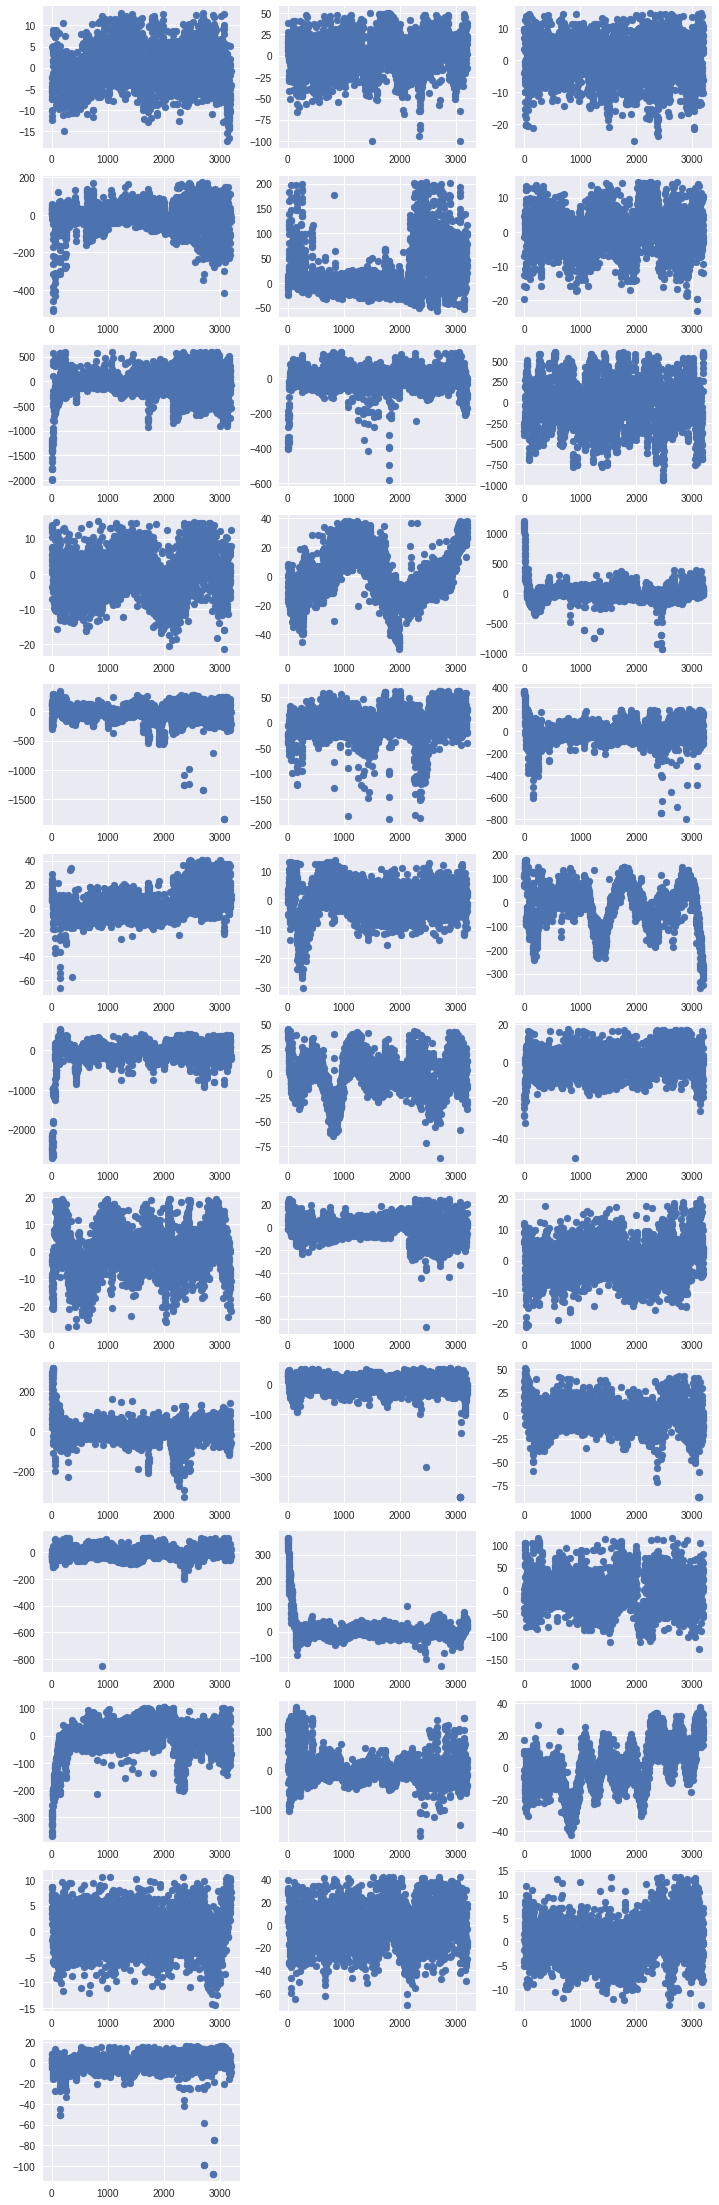

In [15]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df_non.iloc[i,:])

## Smoothing

Now let's try to smooth the data. I'll do this in two steps:

First, I'll run a pass with a fairly wide (41 samples) median filter. I also looked at a Gaussian FIR filter. I don't think the exact choice of this will matter much. The width sets the size of features that we want to select.

This first step is actually going to be used to remove features. I will run the filter and subtract it from the result. Here, any features that are wider than a few tens of samples will be removed, so this is a high-pass filter.

I'll use a 4th order Savitzky-Golay filter (half-width of 10) as the second step. This is an interesting filter since it's an FIR version of running a polynomial least-squares fit at every point. That means that it doesn't just give estimates for the de-noised signal but also for some of the derivatives. I won't use that functionality right now. Again, there are tons of filters that can be used and many of them won't differ too much. I'll just run the filter here, so it will smooth the signals.

Here, I'll plot these steps for several of the exoplanet stars. You'll see the original signal, the high-pass filtered signal, and finally the smoothed signal.

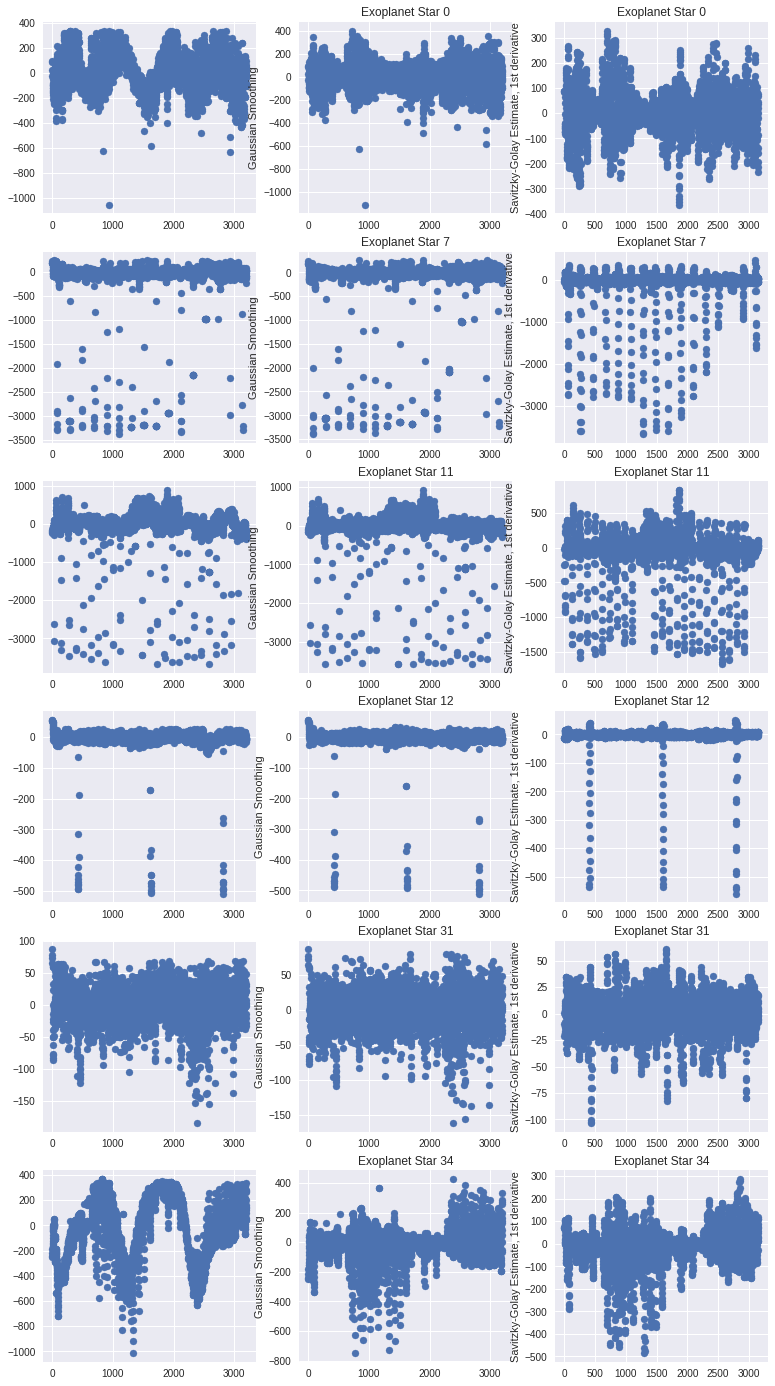

In [16]:
from scipy.signal import savgol_filter
from scipy.signal import gaussian
from scipy.signal import medfilt
from scipy.signal import lfilter

test = [0,7,11,12,31,34]
nfigs = 2 * len(test)
fig = plt.figure(figsize=[13,50])
count = 1
for i in test:
    ax = fig.add_subplot(nfigs,3,count)
    ax.scatter(np.array(range(len(df_exo.iloc[i,:]))),df_exo.iloc[i,:])
    count += 1
    y0 = medfilt(df_exo.iloc[i,:],41)
    for idx in range(len(y0)):
        y0[idx] = df_exo.iloc[i,idx] - y0[idx]
    y1 = savgol_filter(y0,21,4,deriv=0)
    ax = fig.add_subplot(nfigs,3,count)
    count += 1
    ax.scatter( np.array(range(len(y0))),y0)
    ax.set_label('Sample')
    ax.set_ylabel('Gaussian Smoothing')
    ax.set_title('Exoplanet Star '+str(i))
    
    ax = fig.add_subplot(nfigs,3,count)
    count += 1
    ax.scatter( np.array(range(len(y1)-40)),y1[20:-20])
    ax.set_label('Sample')
    ax.set_ylabel('Savitzky-Golay Estimate, 1st derivative')
    ax.set_title('Exoplanet Star '+str(i))
    
plt.show()

You can see here that the first step removed a lot of the broader structure, while the second reduces the size of random noise. The signal is still not clear for the first and maybe last (the last is very noisy) stars. The 2nd, 3rd, and 4th are now extremely clear. The smoothing helped regularize the shape of the peaks, so while the shapes are now different, it will be very easy for a simple peak finder to find them.

The 5th star shows some interesting behavior. In the initial and high-pass-filtered data, we see what looks like a pretty regular structure of the exoplanet going by. However, in the smoothed signal we see that three of the transits are much clearerwhile the others maybe seem less clear. So, are there two kinds of transits here? Or are some of these dips not actually transits?

Regardless, I'll now build a filter function and run it on my two small datasets.

In [17]:
def short_transit_filter(df):

    length = df.shape[0]
    output = []
    for i in range(length):

        y0 = medfilt(df.iloc[i,:],41)
        for idx in range(len(y0)):
            y0[idx] = df.iloc[i,idx] - y0[idx]
        y1 = savgol_filter(y0,21,4,deriv=0) # remove edge effects
        output.append(y1)
    
    return output
    

In [18]:
out_exo = short_transit_filter(df_exo)
out_non = short_transit_filter(df_non)

Now, we can look at what we did to our data.

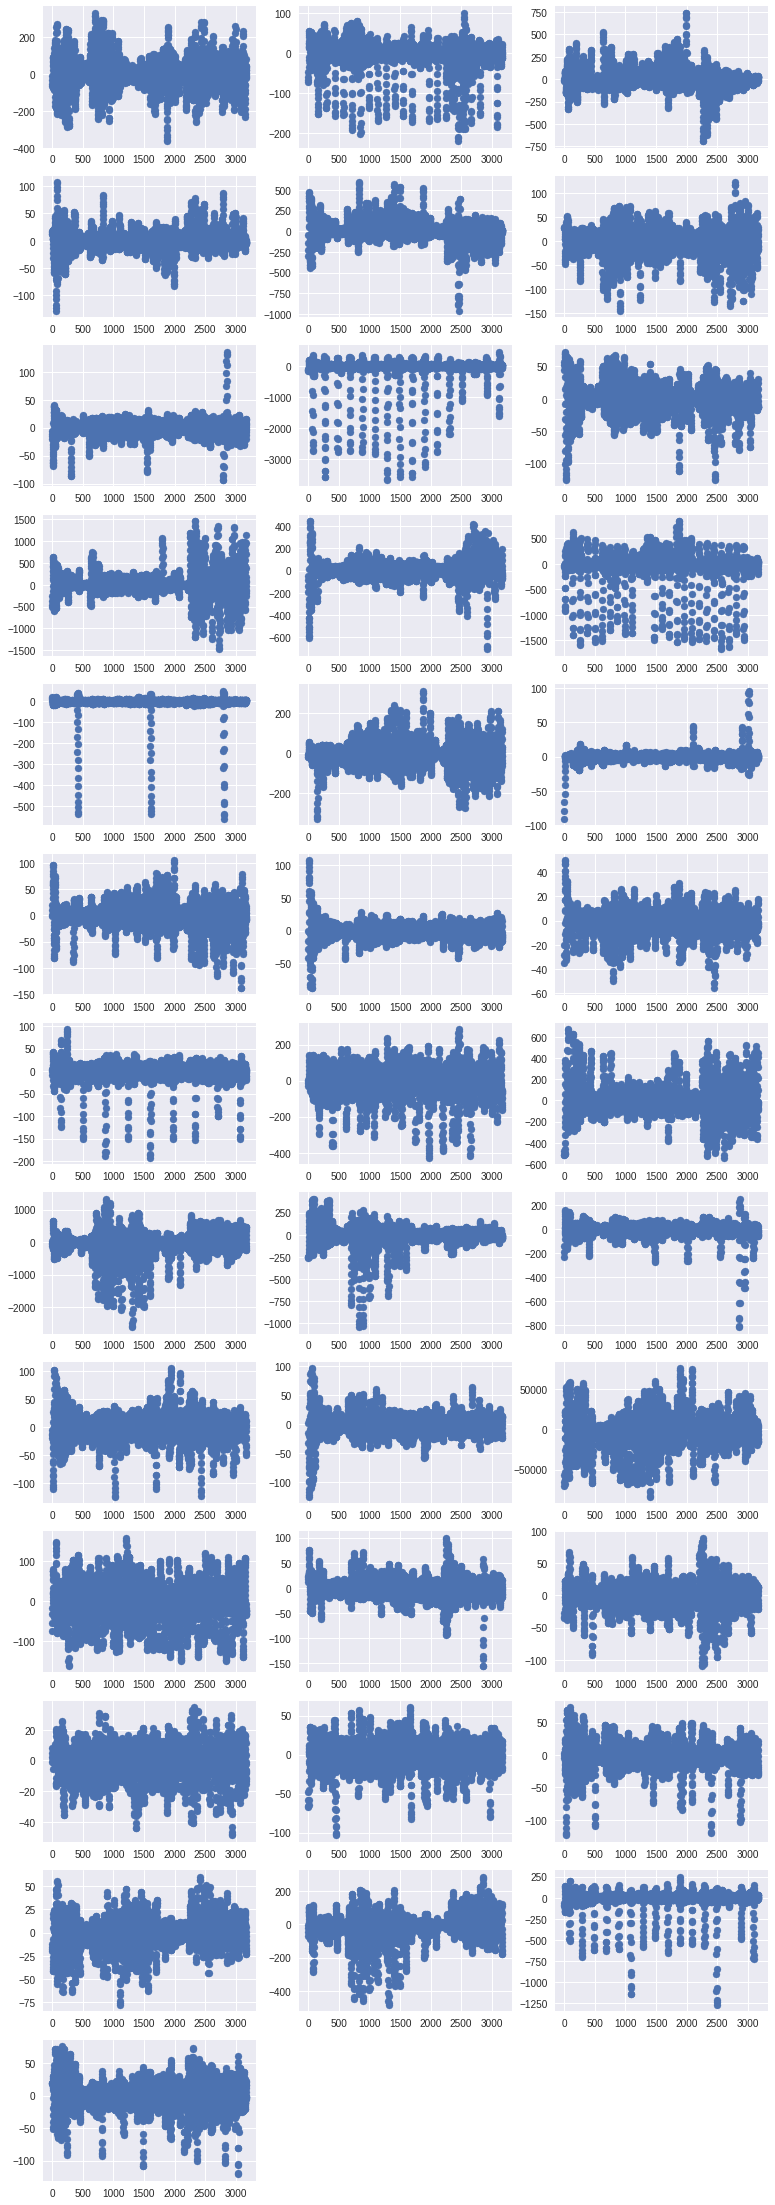

In [19]:
fig = plt.figure(figsize=(13,40))
x = np.array(range(len(out_exo[0])-24))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,out_exo[i][12:-12])

Here, we can see obvious exoplanet transits in about half of our data. We also see that the smoothing is clearly affected by outliers (see some of the upward peaks that have appeared). We may want to develop smarter outlier removers that look for local outliers as well.

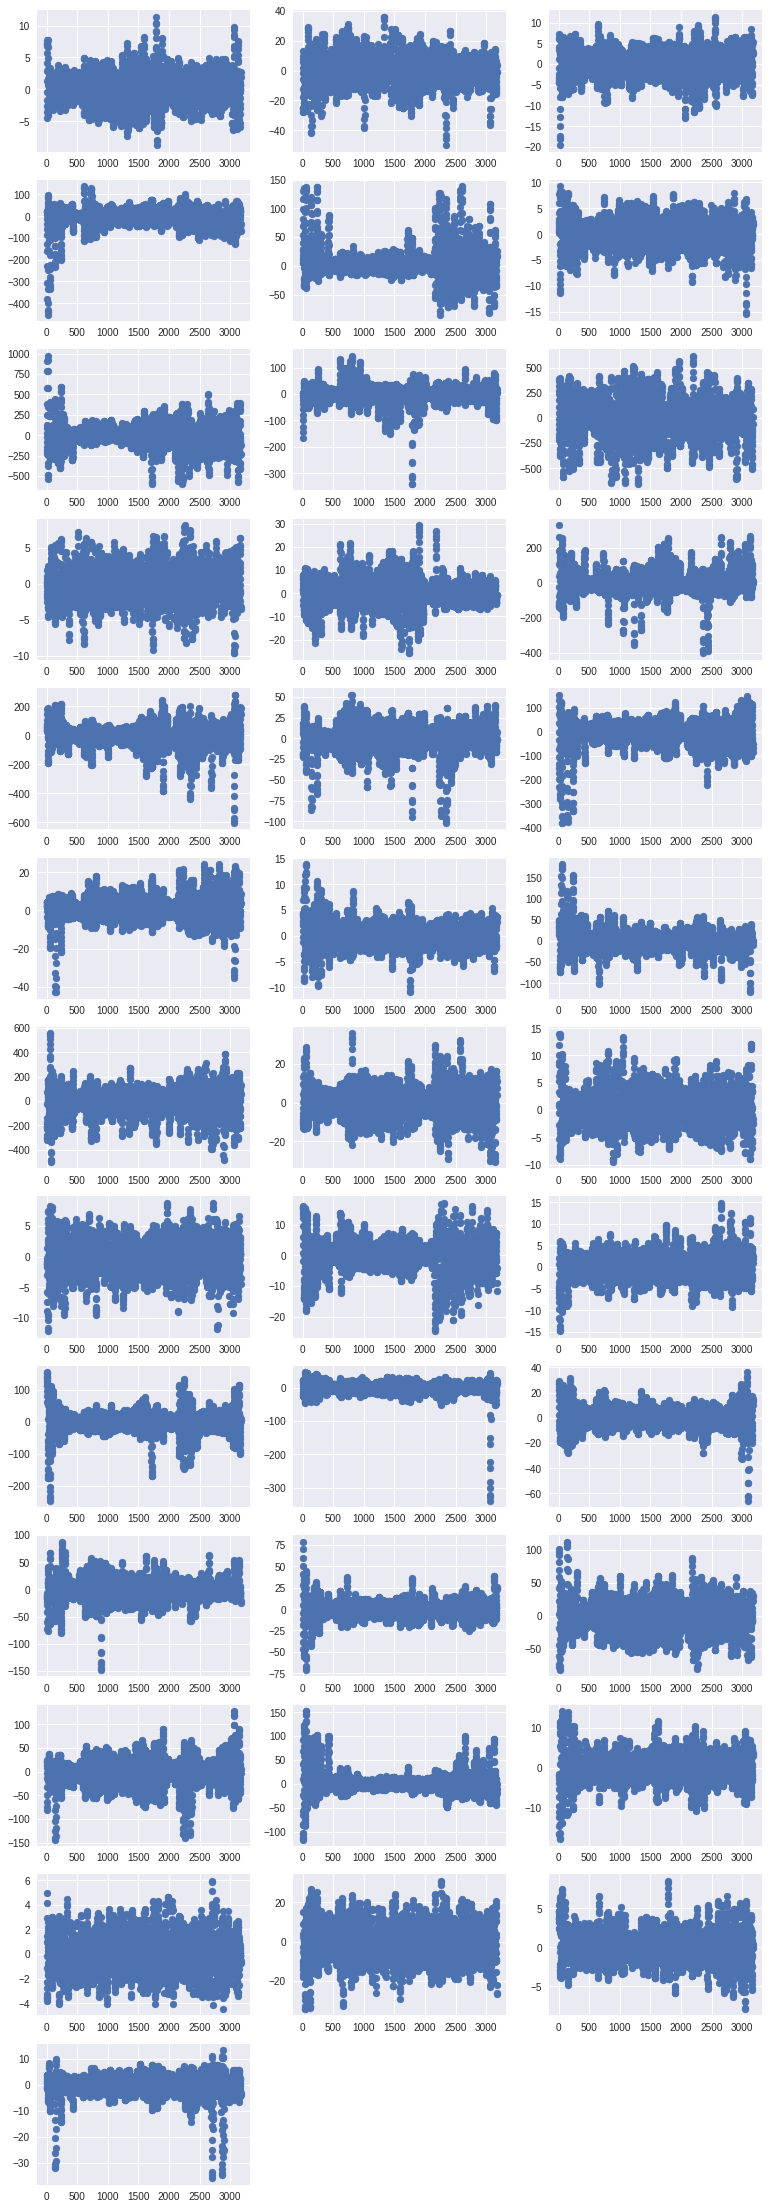

In [20]:
fig = plt.figure(figsize=(13,40))
x = np.array(range(len(out_exo[0])-24))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,out_non[i][12:-12])

In the non-exoplanet data we see downward spikes as well, but mostly isolated or at irregular intervals. If you look closely at the original data, many of these seem to be from single isolated data points. Maybe we should develop an outlier remover for downward spikes, but that might prove to be quite difficult if we don't want to remove our exoplanet events.

In [21]:
## After filtering

df_exo_filt = pd.DataFrame(out_exo)
df_non_filt = pd.DataFrame(out_non)

## Post-smoothing statistics

Now let's see what happened to some of the basic statistics we looked at before.

In [22]:
means2 = df_exo_filt.mean(axis=1)
std2 = df_exo_filt.std(axis=1)
medians2 = df_exo_filt.median(axis=1)
means1 = df_non_filt.mean(axis=1)
std1 = df_non_filt.std(axis=1)
medians1 = df_non_filt.median(axis=1)

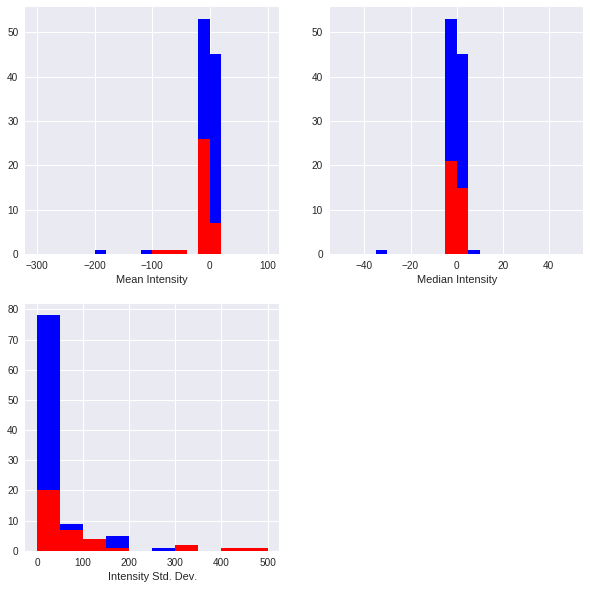

In [23]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax.hist(means1,color='b',range=(-300,100),bins=20)
ax.hist(means2,color='r',range=(-300,100),bins=20)
ax.set_xlabel('Mean Intensity')
ax = fig.add_subplot(222)
ax.hist(medians1,color='b',range=(-50,50),bins=20)
ax.hist(medians2,color='r',range=(-50,50),bins=20)
ax.set_xlabel('Median Intensity')
ax = fig.add_subplot(223)
ax.hist(std1,color='b',range=(0,500),bins=10)
ax.hist(std2,color='r',range=(0,500),bins=10)
ax.set_xlabel('Intensity Std. Dev.')

plt.show()

As we might have expected, our smoothing has caused significant reductions in the mean and median data for most of our data. The standard deviation also looks like it has been reduced substantially.

# Additional Work to Do

This just shows some visualizations and some basic processing steps. We haven't tried to classify anything yet. There's still a lot of processing that can be done. It may be useful to run several smoothing steps looking at different feature sizes. Once that's done, it might be good to then start data reduction. Taking FFTs of many samples may give us some information about any kind of instrument noise. If there are some characteristic frequencies of noise, we could try to filter them out.

Autocorrelation or partial autocorrelation may be quite useful in helping find periodic features such as the short-duration, short-interval transits. 

With such a small exoplanet sample, it may be impossible to achieve a very high purity sample. However, even getting a substantial reduction in non-exoplanet data could be useful. I also wonder if maybe neural nets can be enlisted to look for exoplanet-like features.